In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the dataset 
df = pd.read_csv('housing.csv')


In [3]:
df.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [28]:

# define a fct to visualize the relationship between var/target 
def relationship(data, column,target):

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=column, y=target, data=data)
    plt.title(column+' vs '+ target)
    plt.xlabel(column)
    plt.ylabel(target)
    plt.show()

In [29]:
counts = df['ocean_proximity'].value_counts()
counts

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [30]:
df = df[df['ocean_proximity'] != 'ISLAND']

In [31]:
counts = df['ocean_proximity'].value_counts()
counts

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64

In [32]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20635.000000  20635.000000        20635.000000  20635.000000   
mean    -119.569999     35.632412           28.636152   2636.020208   
std        2.003685      2.135918           12.583924   2181.794772   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1448.000000   
50%     -118.500000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20428.000000  20635.000000  20635.000000   20635.000000   
mean       537.899305   1425.660286    499.593700       3.870944   
std        421.425970   1132.530137    382.357072       1.899961   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563100   
50%        435.000000   1166.000000    409.000000       3.535200   
75%        647.000000   1725.000000    605.000000       4.743700   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20635.000000  
mean        206813.756288  
std         115372.499511  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264700.000000  
max         500001.000000

In [33]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [34]:
df.isna().sum()
#drop missing values 
df.dropna(subset=['total_bedrooms'], inplace=True)

In [35]:
# drop duplicates rows if they exist 
# check for duplicates 
df.duplicated().sum()

np.int64(0)

In [36]:
# feature engeneering 
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_household'] = df['total_bedrooms'] / df['households']
df['population_per_household'] = df['population'] / df['households']

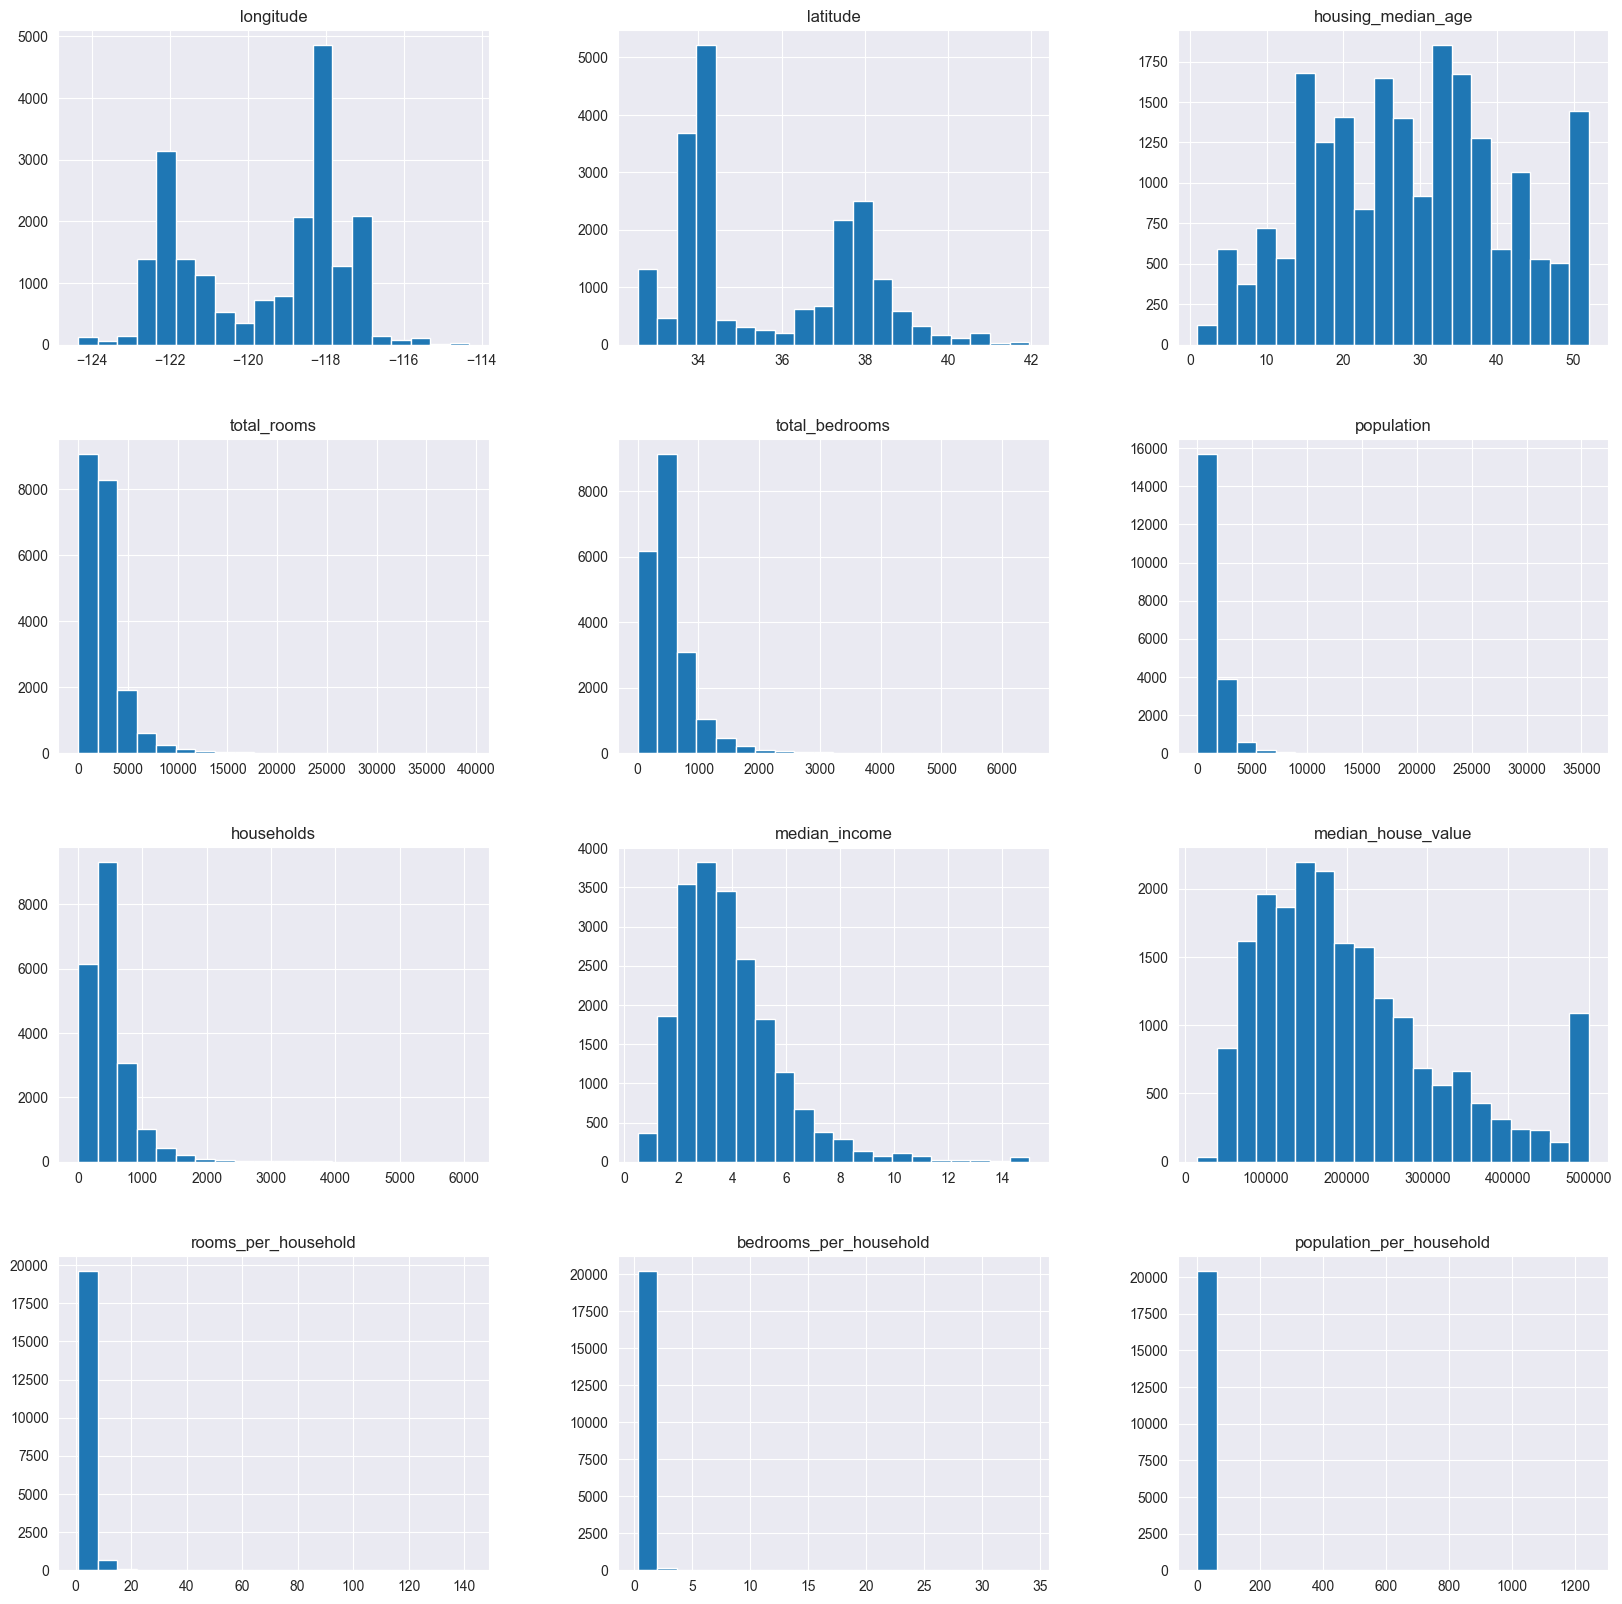

In [37]:
# visualize data : 
df.hist(bins=20, figsize=(20, 20))
plt.show()

In [38]:
# Apply log transformation
df['total_rooms_log'] = np.log1p(df['total_rooms'])
df['total_bedrooms_log'] = np.log1p(df['total_bedrooms'])
df['population_log'] = np.log1p(df['population'])
df['households_log'] = np.log1p(df['households'])
df['median_income_log'] = np.log1p(df['median_income'])
df['population_per_household_log'] = np.log1p(df['population_per_household'])


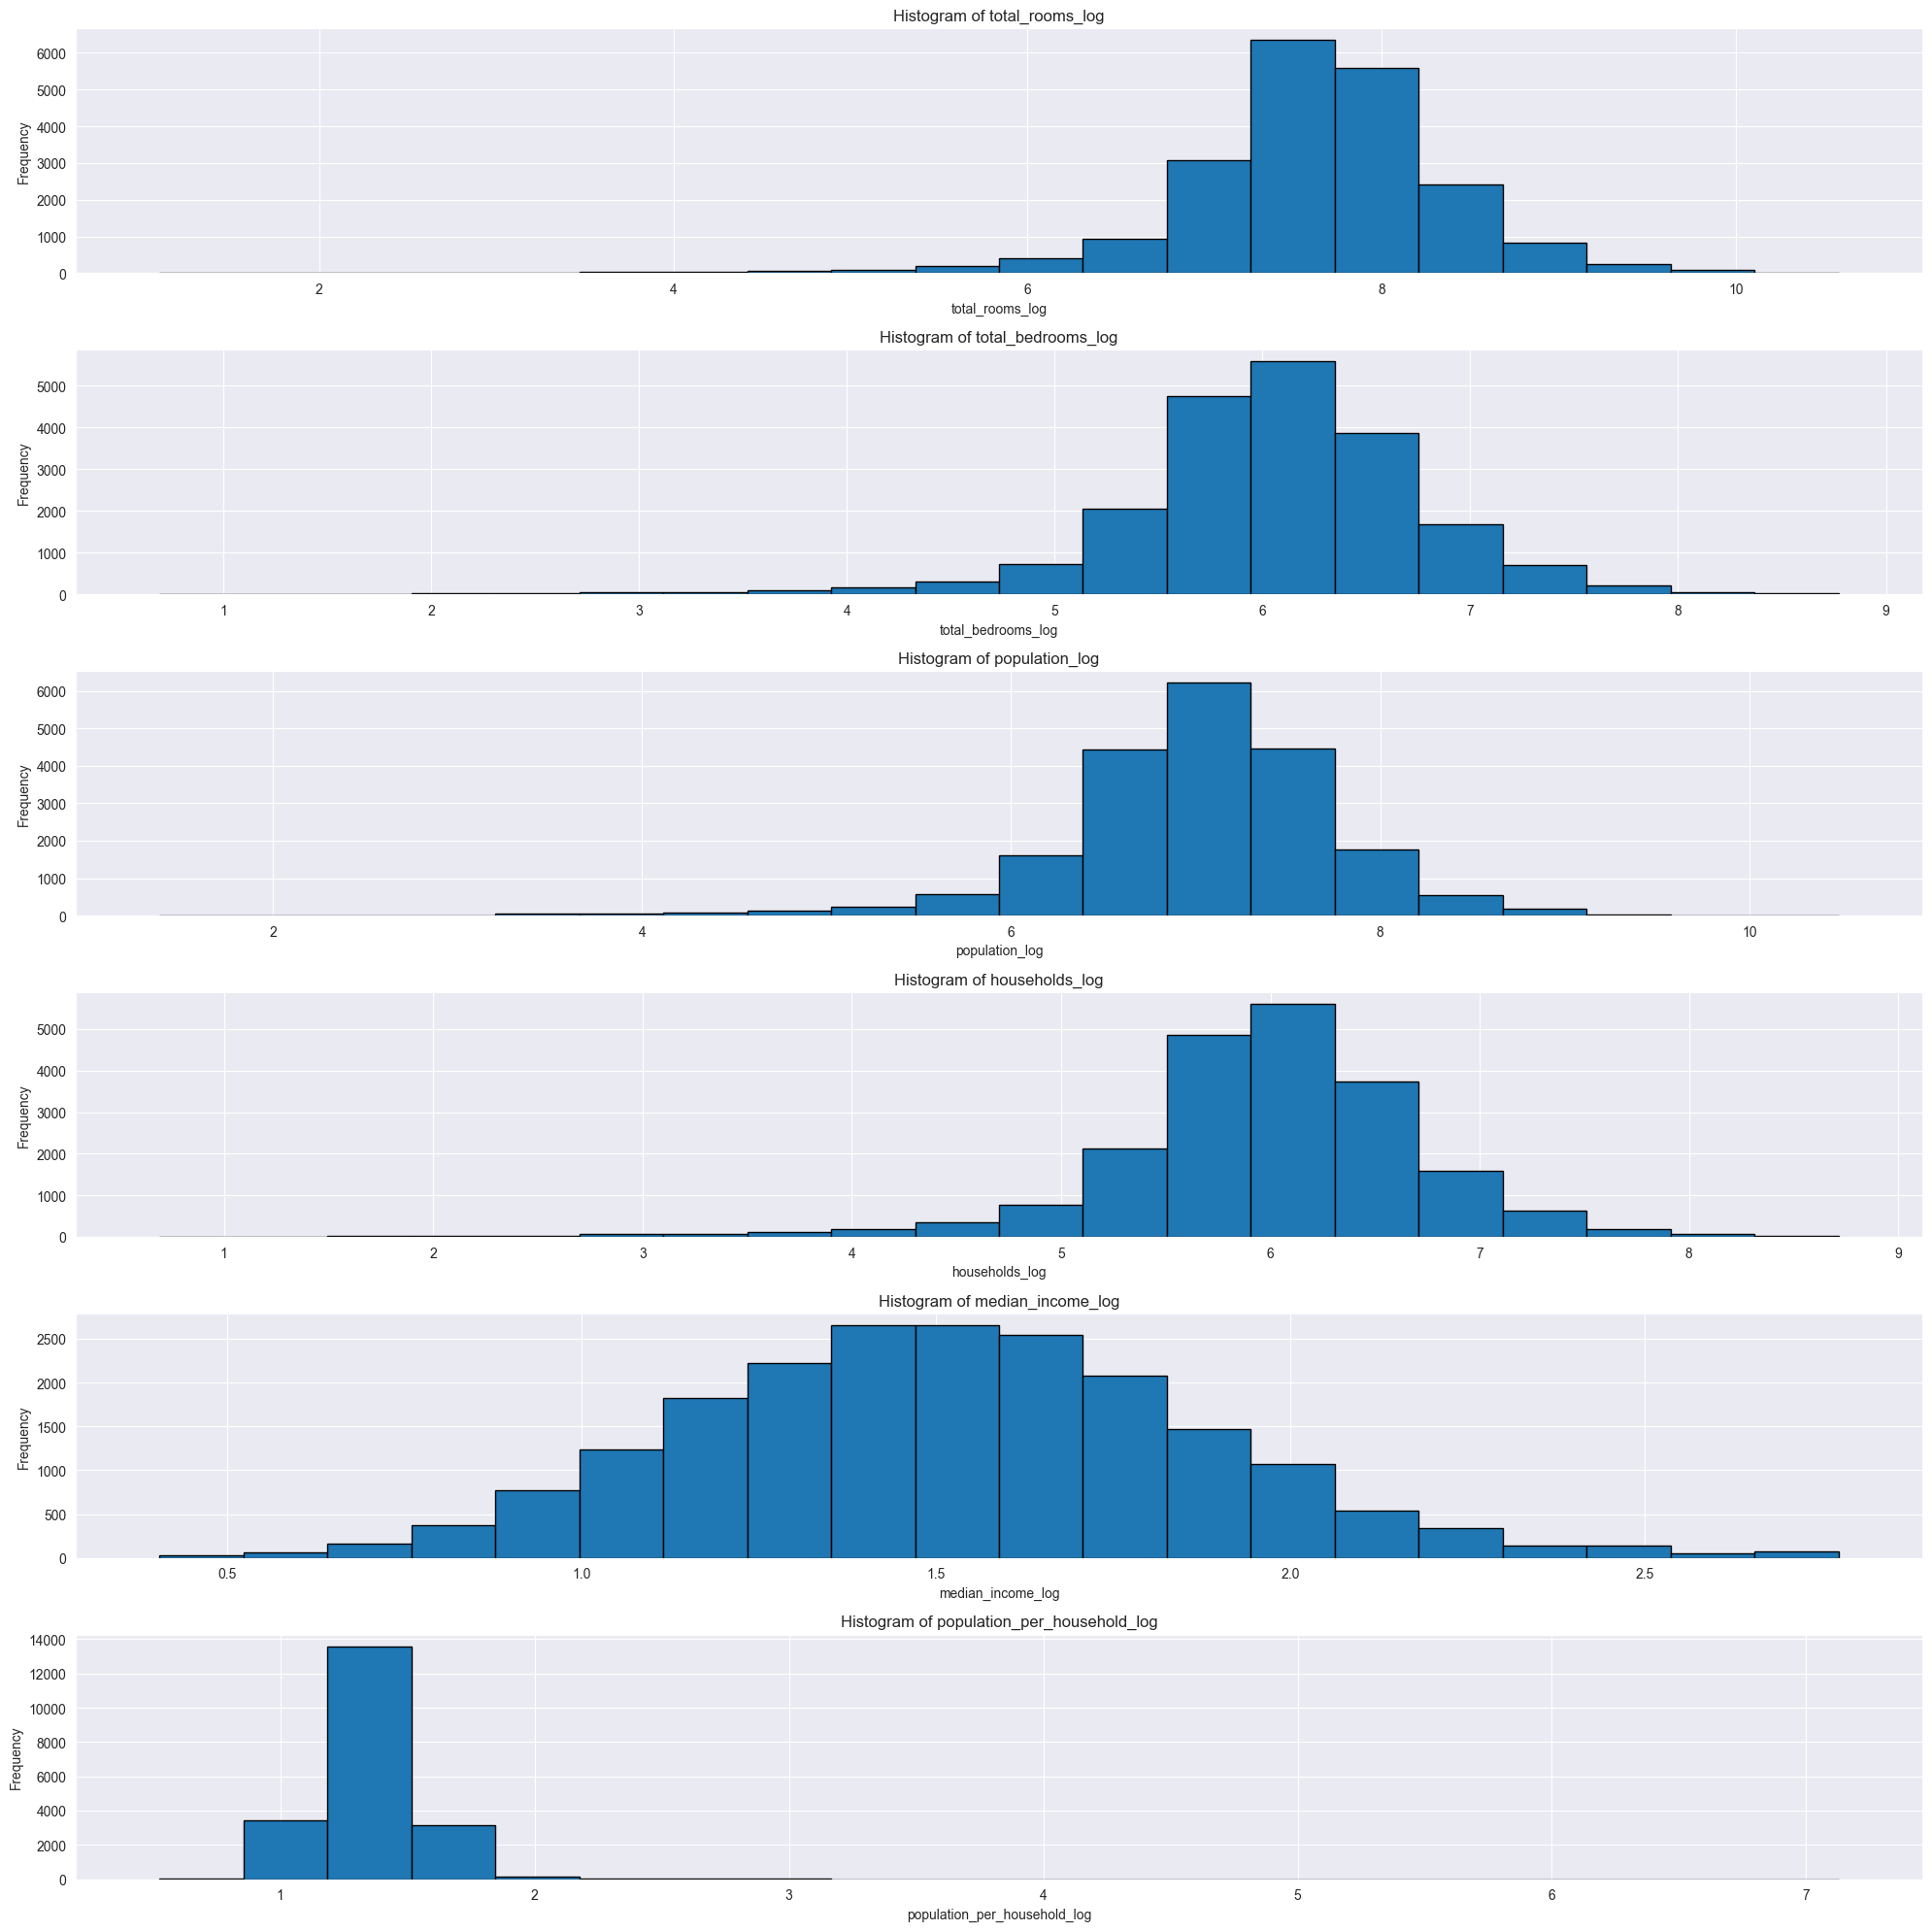

In [39]:
log_features = ['total_rooms_log', 'total_bedrooms_log', 'population_log', 'households_log', 'median_income_log', 'population_per_household_log']

# Plot histograms for specific features
def plot_histograms(df, features, bins=20):
    plt.figure(figsize=(20, 20))
    for i, feature in enumerate(features):
        plt.subplot(len(features), 1, i + 1)
        df[feature].hist(bins=bins, edgecolor='black')
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Call the function to plot histograms for the log-transformed features
plot_histograms(df, log_features)

In [40]:
# normalization : 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
def standardize(df, scaler,columns):
    # Fit and transform the entire DataFrame
    df_temp = df.drop(['ocean_proximity', 'median_house_value','total_rooms', 
'median_income', 
'households', 
'population',
'total_bedrooms',
'population_per_household'], axis=1)
    standardized_data = scaler.fit_transform(df_temp)
    
    # Retrieve the mean and standard deviation
    means = scaler.mean_
    stds = scaler.scale_

    # Convert to a dictionary for easy access
    
    standardization_params = dict(zip(df_temp.columns, zip(means, stds)))
    
    # Create a new DataFrame with the standardized data
    standardized_df = pd.DataFrame(standardized_data, columns=[col + '_Z_Score' for col in columns], index=df.index)
    
    return standardized_df, standardization_params

In [42]:
columns = df.columns.tolist()
columns.remove('ocean_proximity')
columns.remove('median_house_value')
columns.remove('total_rooms')
columns.remove('median_income')
columns.remove('households')
columns.remove('population')
columns.remove('total_bedrooms')
columns.remove('population_per_household')
columns

['longitude',
 'latitude',
 'housing_median_age',
 'rooms_per_household',
 'bedrooms_per_household',
 'total_rooms_log',
 'total_bedrooms_log',
 'population_log',
 'households_log',
 'median_income_log',
 'population_per_household_log']

In [43]:
new_df, stds_params = standardize(df, scaler, columns)
new_df


longitude_Z_Score  latitude_Z_Score  housing_median_age_Z_Score  \
0              -1.327063          1.051474                    0.982560   
1              -1.322072          1.042112                   -0.606022   
2              -1.332054          1.037431                    1.856279   
3              -1.337044          1.037431                    1.856279   
4              -1.337044          1.037431                    1.856279   
...                  ...               ...                         ...   
20635          -0.758111          1.800446                   -0.288306   
20636          -0.818000          1.805127                   -0.844309   
20637          -0.822991          1.777041                   -0.923738   
20638          -0.872899          1.777041                   -0.844309   
20639          -0.832973          1.748955                   -1.003167   

       rooms_per_household_Z_Score  bedrooms_per_household_Z_Score  \
0                         0.625356                       -0.153644   
1                         0.324932                       -0.262716   
2                         1.150504                       -0.049385   
3                         0.155474                       -0.050198   
4                         0.342538                       -0.033349   
...                            ...                             ...   
20635                    -0.155382                        0.076403   
20636                     0.274954                        0.459638   
20637                    -0.090912                        0.048591   
20638                    -0.040987                        0.157451   
20639                    -0.071109                        0.137170   

       total_rooms_log_Z_Score  total_bedrooms_log_Z_Score  \
0                    -1.131013                   -1.633524   
1                     1.650347                    1.313593   
2                    -0.450467                   -1.104142   
3                    -0.638337                   -0.813048   
4                    -0.312583                   -0.572912   
...                        ...                         ...   
20635                -0.281830                   -0.175852   
20636                -1.441350                   -1.427482   
20637                 0.121653                    0.180908   
20638                -0.134300                   -0.053074   
20639                 0.403491                    0.509294   

       population_log_Z_Score  households_log_Z_Score  \
0                   -1.694400               -1.568992   
1                    1.030518                1.449036   
2                   -1.109140               -1.104541   
3                   -0.949481               -0.813095   
4                   -0.932580               -0.583269   
...                       ...                     ...   
20635               -0.386721               -0.251110   
20636               -1.558476               -1.705543   
20637               -0.148775                0.121619   
20638               -0.564865               -0.174322   
20639                0.285679                0.399134   

       median_income_log_Z_Score  population_per_household_log_Z_Score  
0                       1.995047                             -0.399481  
1                       1.987922                             -1.044000  
2                       1.655981                             -0.076670  
3                       1.049478                             -0.409792  
4                       0.170148                             -0.934427  
...                          ...                                   ...  
20635                  -1.608872                             -0.392650  
20636                  -0.692313                              0.312808  
20637                  -1.460747                             -0.721167  
20638                  -1.293224                             -1.023360  
20639                  -0.827382            

In [44]:
stds_params

{'longitude': (np.float64(-119.57098639122775),
  np.float64(2.0036833619831143)),
 'latitude': (np.float64(35.633778147640484), np.float64(2.136260129990799)),
 'housing_median_age': (np.float64(28.629723908361072),
  np.float64(12.589847902173602)),
 'rooms_per_household': (np.float64(5.4312888106655235),
  np.float64(2.4831272299642775)),
 'bedrooms_per_household': (np.float64(1.0969583762175268),
  np.float64(0.4760945712837238)),
 'total_rooms_log': (np.float64(7.6296316468387815),
  np.float64(0.7502777814737082)),
 'total_bedrooms_log': (np.float64(6.054729939509831),
  np.float64(0.7267694515482398)),
 'population_log': (np.float64(7.025268953996701),
  np.float64(0.7363174431950193)),
 'households_log': (np.float64(5.984643026150241),
  np.float64(0.7268715736185464)),
 'median_income_log': (np.float64(1.5171689099889567),
  np.float64(0.3586639550804106)),
 'population_per_household_log': (np.float64(1.3515286144153444),
  np.float64(0.2078129719598193))}

In [45]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the 'ocean_proximity' column
encoded_array = encoder.fit_transform(df[['ocean_proximity']])

# Convert the encoded array to a DataFrame with the same index as the original DataFrame
df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['ocean_proximity']), index=df.index)

# Display the encoded DataFrame
df_encoded


ocean_proximity_INLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       1.0   
1                         0.0                       1.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         0.0                       1.0   
...                       ...                       ...   
20635                     1.0                       0.0   
20636                     1.0                       0.0   
20637                     1.0                       0.0   
20638                     1.0                       0.0   
20639                     1.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
20635                         0.0  
20636                         0.0  
20637                         0.0  
20638                         0.0  
20639                         0.0  

[20428 rows x 3 columns]

In [91]:
# now gather the whole dataset : 
housing_data = pd.concat([new_df, df_encoded], axis=1)
housing_data.tail()

longitude_Z_Score  latitude_Z_Score  housing_median_age_Z_Score  \
20635          -0.758111          1.800446                   -0.288306   
20636          -0.818000          1.805127                   -0.844309   
20637          -0.822991          1.777041                   -0.923738   
20638          -0.872899          1.777041                   -0.844309   
20639          -0.832973          1.748955                   -1.003167   

       rooms_per_household_Z_Score  bedrooms_per_household_Z_Score  \
20635                    -0.155382                        0.076403   
20636                     0.274954                        0.459638   
20637                    -0.090912                        0.048591   
20638                    -0.040987                        0.157451   
20639                    -0.071109                        0.137170   

       total_rooms_log_Z_Score  total_bedrooms_log_Z_Score  \
20635                -0.281830                   -0.175852   
20636                -1.441350                   -1.427482   
20637                 0.121653                    0.180908   
20638                -0.134300                   -0.053074   
20639                 0.403491                    0.509294   

       population_log_Z_Score  households_log_Z_Score  \
20635               -0.386721               -0.251110   
20636               -1.558476               -1.705543   
20637               -0.148775                0.121619   
20638               -0.564865               -0.174322   
20639                0.285679                0.399134   

       median_income_log_Z_Score  population_per_household_log_Z_Score  \
20635                  -1.608872                             -0.392650   
20636                  -0.692313                              0.312808   
20637                  -1.460747                             -0.721167   
20638                  -1.293224                             -1.023360   
20639                  -0.827382                             -0.317059   

       ocean_proximity_INLAND  ocean_proximity_NEAR BAY  \
20635                     1.0                       0.0   
20636                     1.0                       0.0   
20637                     1.0                       0.0   
20638                     1.0                       0.0   
20639                     1.0                       0.0   

       ocean_proximity_NEAR OCEAN  
20635                         0.0  
20636                         0.0  
20637                         0.0  
20638                         0.0  
20639                         0.0

In [47]:
# Ensure the indices of both DataFrames match
df = df.sort_index()
housing_data = housing_data.sort_index()

# Assign values from df['median_house_value'] to housing_data['median_house_value'] based on matching indices
housing_data['median_house_value'] = df['median_house_value']

# Print the updated housing_data DataFrame to verify
housing_data

longitude_Z_Score  latitude_Z_Score  housing_median_age_Z_Score  \
0              -1.327063          1.051474                    0.982560   
1              -1.322072          1.042112                   -0.606022   
2              -1.332054          1.037431                    1.856279   
3              -1.337044          1.037431                    1.856279   
4              -1.337044          1.037431                    1.856279   
...                  ...               ...                         ...   
20635          -0.758111          1.800446                   -0.288306   
20636          -0.818000          1.805127                   -0.844309   
20637          -0.822991          1.777041                   -0.923738   
20638          -0.872899          1.777041                   -0.844309   
20639          -0.832973          1.748955                   -1.003167   

       rooms_per_household_Z_Score  bedrooms_per_household_Z_Score  \
0                         0.625356                       -0.153644   
1                         0.324932                       -0.262716   
2                         1.150504                       -0.049385   
3                         0.155474                       -0.050198   
4                         0.342538                       -0.033349   
...                            ...                             ...   
20635                    -0.155382                        0.076403   
20636                     0.274954                        0.459638   
20637                    -0.090912                        0.048591   
20638                    -0.040987                        0.157451   
20639                    -0.071109                        0.137170   

       total_rooms_log_Z_Score  total_bedrooms_log_Z_Score  \
0                    -1.131013                   -1.633524   
1                     1.650347                    1.313593   
2                    -0.450467                   -1.104142   
3                    -0.638337                   -0.813048   
4                    -0.312583                   -0.572912   
...                        ...                         ...   
20635                -0.281830                   -0.175852   
20636                -1.441350                   -1.427482   
20637                 0.121653                    0.180908   
20638                -0.134300                   -0.053074   
20639                 0.403491                    0.509294   

       population_log_Z_Score  households_log_Z_Score  \
0                   -1.694400               -1.568992   
1                    1.030518                1.449036   
2                   -1.109140               -1.104541   
3                   -0.949481               -0.813095   
4                   -0.932580               -0.583269   
...                       ...                     ...   
20635               -0.386721               -0.251110   
20636               -1.558476               -1.705543   
20637               -0.148775                0.121619   
20638               -0.564865               -0.174322   
20639                0.285679                0.399134   

       median_income_log_Z_Score  population_per_household_log_Z_Score  \
0                       1.995047                             -0.399481   
1                       1.987922                             -1.044000   
2                       1.655981                             -0.076670   
3                       1.049478                             -0.409792   
4                       0.170148                             -0.934427   
...                          ...                                   ...   
20635                  -1.608872                             -0.392650   
20636                  -0.692313                              0.312808   
20637                  -1.460747                             -0.721167   
20638                  -1.293224                             -1.023360   
20639                  -0.827382 

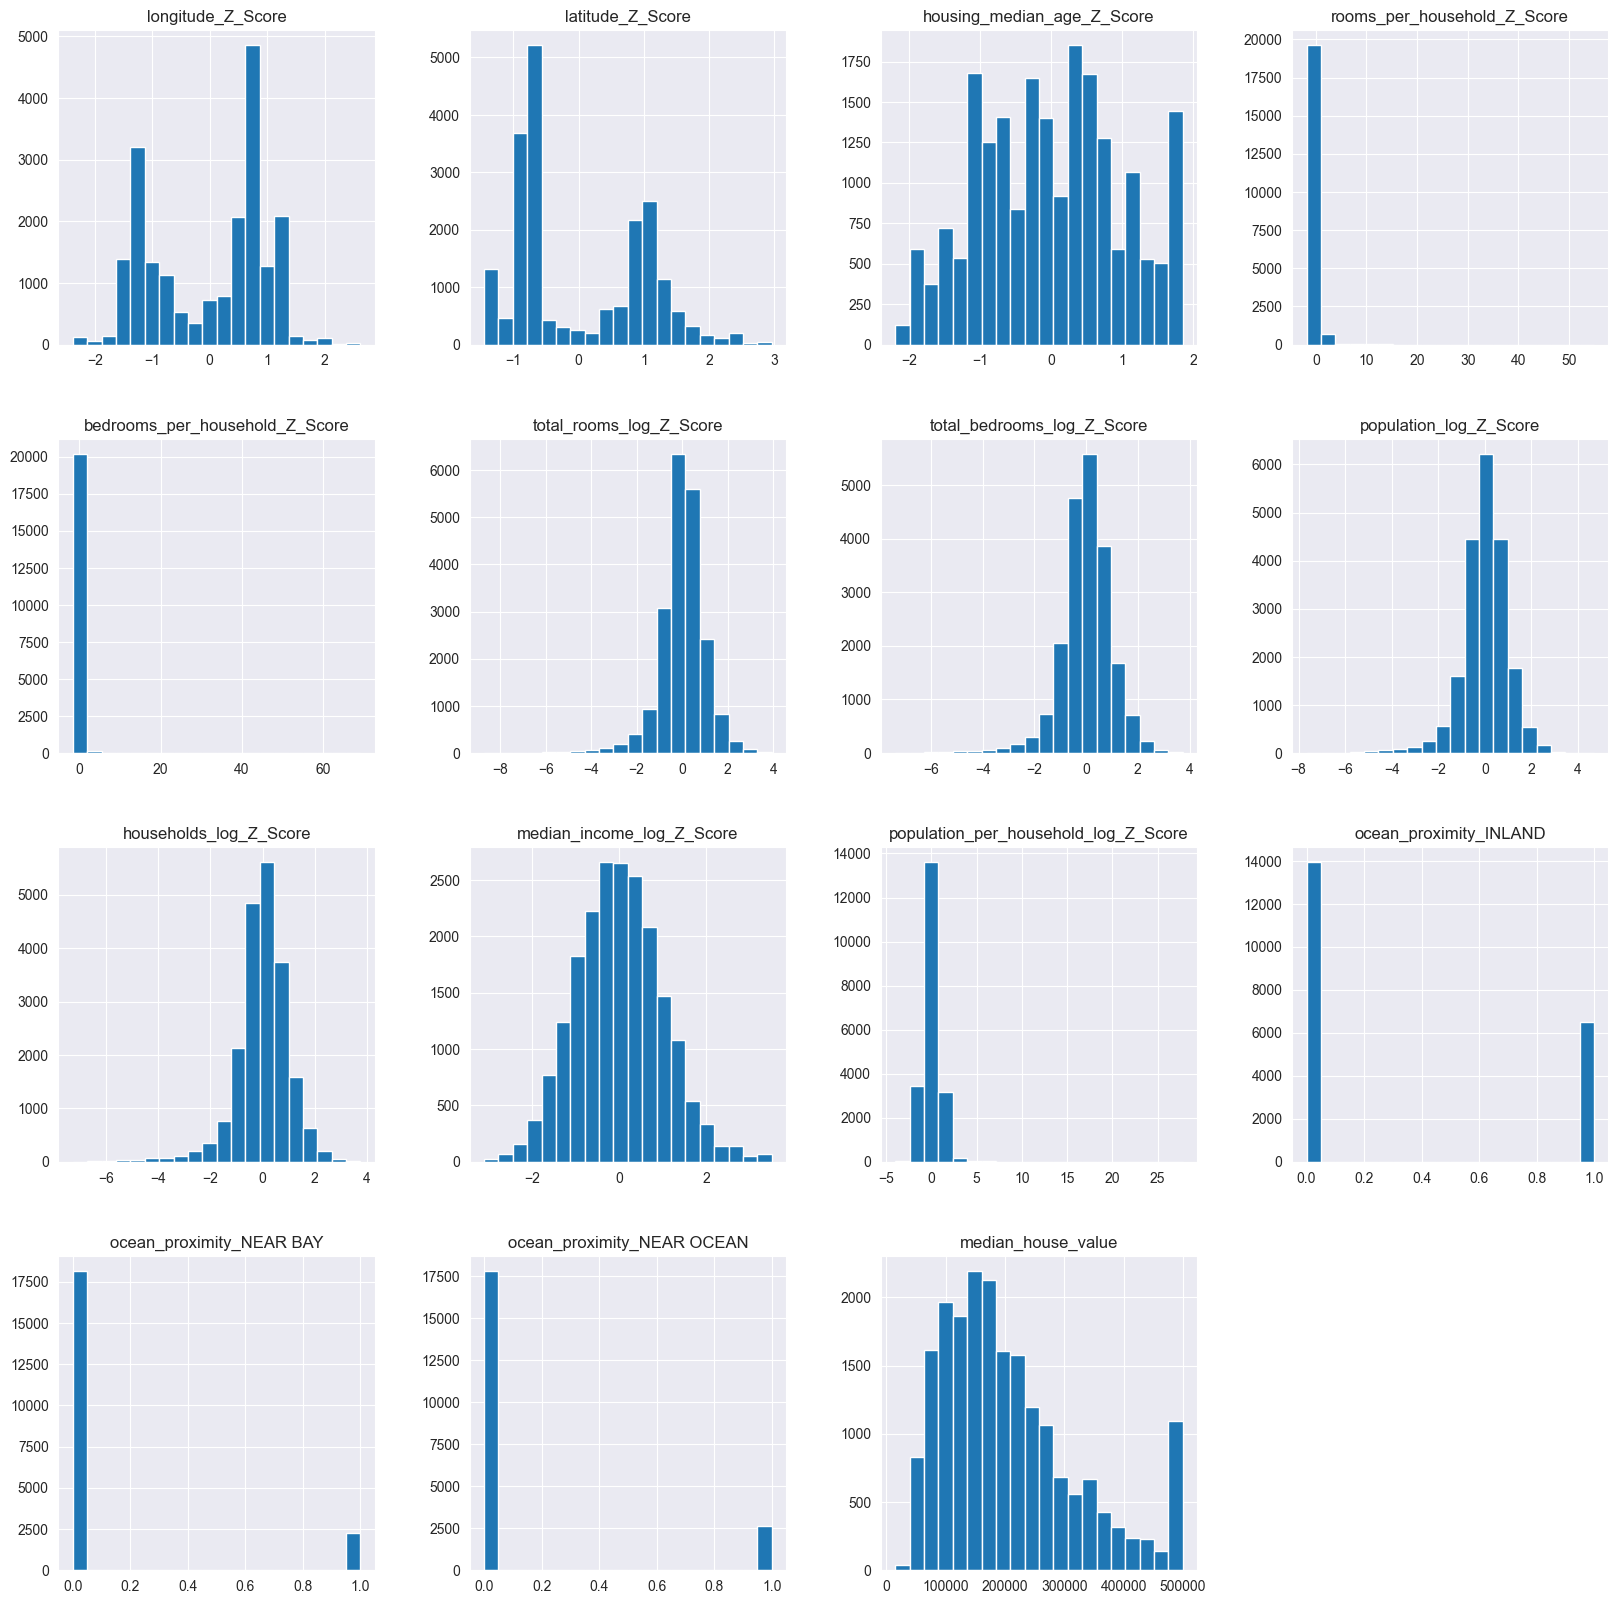

In [48]:
# data distribution after fixing skeweness and standardization , one hot-encoding : 
housing_data.hist(bins=20, figsize=(20, 20))
plt.show()

In [49]:
# remove outliers : 
# Define the threshold for outliers
threshold = 3

# Identify outliers
outliers_rooms_per = housing_data[np.abs(housing_data['rooms_per_household_Z_Score']) > threshold]
outliers_bedrooms_per = housing_data[np.abs(housing_data['bedrooms_per_household_Z_Score']) > threshold]
outliers_population_per = housing_data[np.abs(housing_data['population_per_household_log_Z_Score']) > threshold]
outliers_longitude = housing_data[np.abs(housing_data['longitude_Z_Score']) > threshold]
outliers_latitude = housing_data[np.abs(housing_data['latitude_Z_Score']) > threshold]
outliers_housing_med_age = housing_data[np.abs(housing_data['housing_median_age_Z_Score']) > threshold]
outliers_tot_bed = housing_data[np.abs(housing_data['total_bedrooms_log_Z_Score']) > threshold]
outliers_tot_rooms = housing_data[np.abs(housing_data['total_rooms_log_Z_Score']) > threshold]
outliers_population = housing_data[np.abs(housing_data['population_log_Z_Score']) > threshold]
outliers_households = housing_data[np.abs(housing_data['households_log_Z_Score']) > threshold]
outliers_med_income = housing_data[np.abs(housing_data['median_income_log_Z_Score']) > threshold]



In [50]:
# Remove outliers
housing_data_no_outliers = housing_data[(np.abs(housing_data['rooms_per_household_Z_Score']) <= threshold) & 
                    (np.abs(housing_data['bedrooms_per_household_Z_Score']) <= threshold) &
                    (np.abs(housing_data['population_per_household_log_Z_Score']) <= threshold) &
                    (np.abs(housing_data['longitude_Z_Score']) <= threshold) & #
                    (np.abs(housing_data['latitude_Z_Score']) <= threshold) & #
                    (np.abs(housing_data['housing_median_age_Z_Score']) <= threshold) & #
                    (np.abs(housing_data['total_bedrooms_log_Z_Score']) <= threshold) & #
                    (np.abs(housing_data['total_rooms_log_Z_Score']) <= threshold) &#
                    (np.abs(housing_data['households_log_Z_Score']) <= threshold) & #
                    (np.abs(housing_data['median_income_log_Z_Score']) <= threshold) &
                    (np.abs(housing_data['population_log_Z_Score']) <= threshold)] 


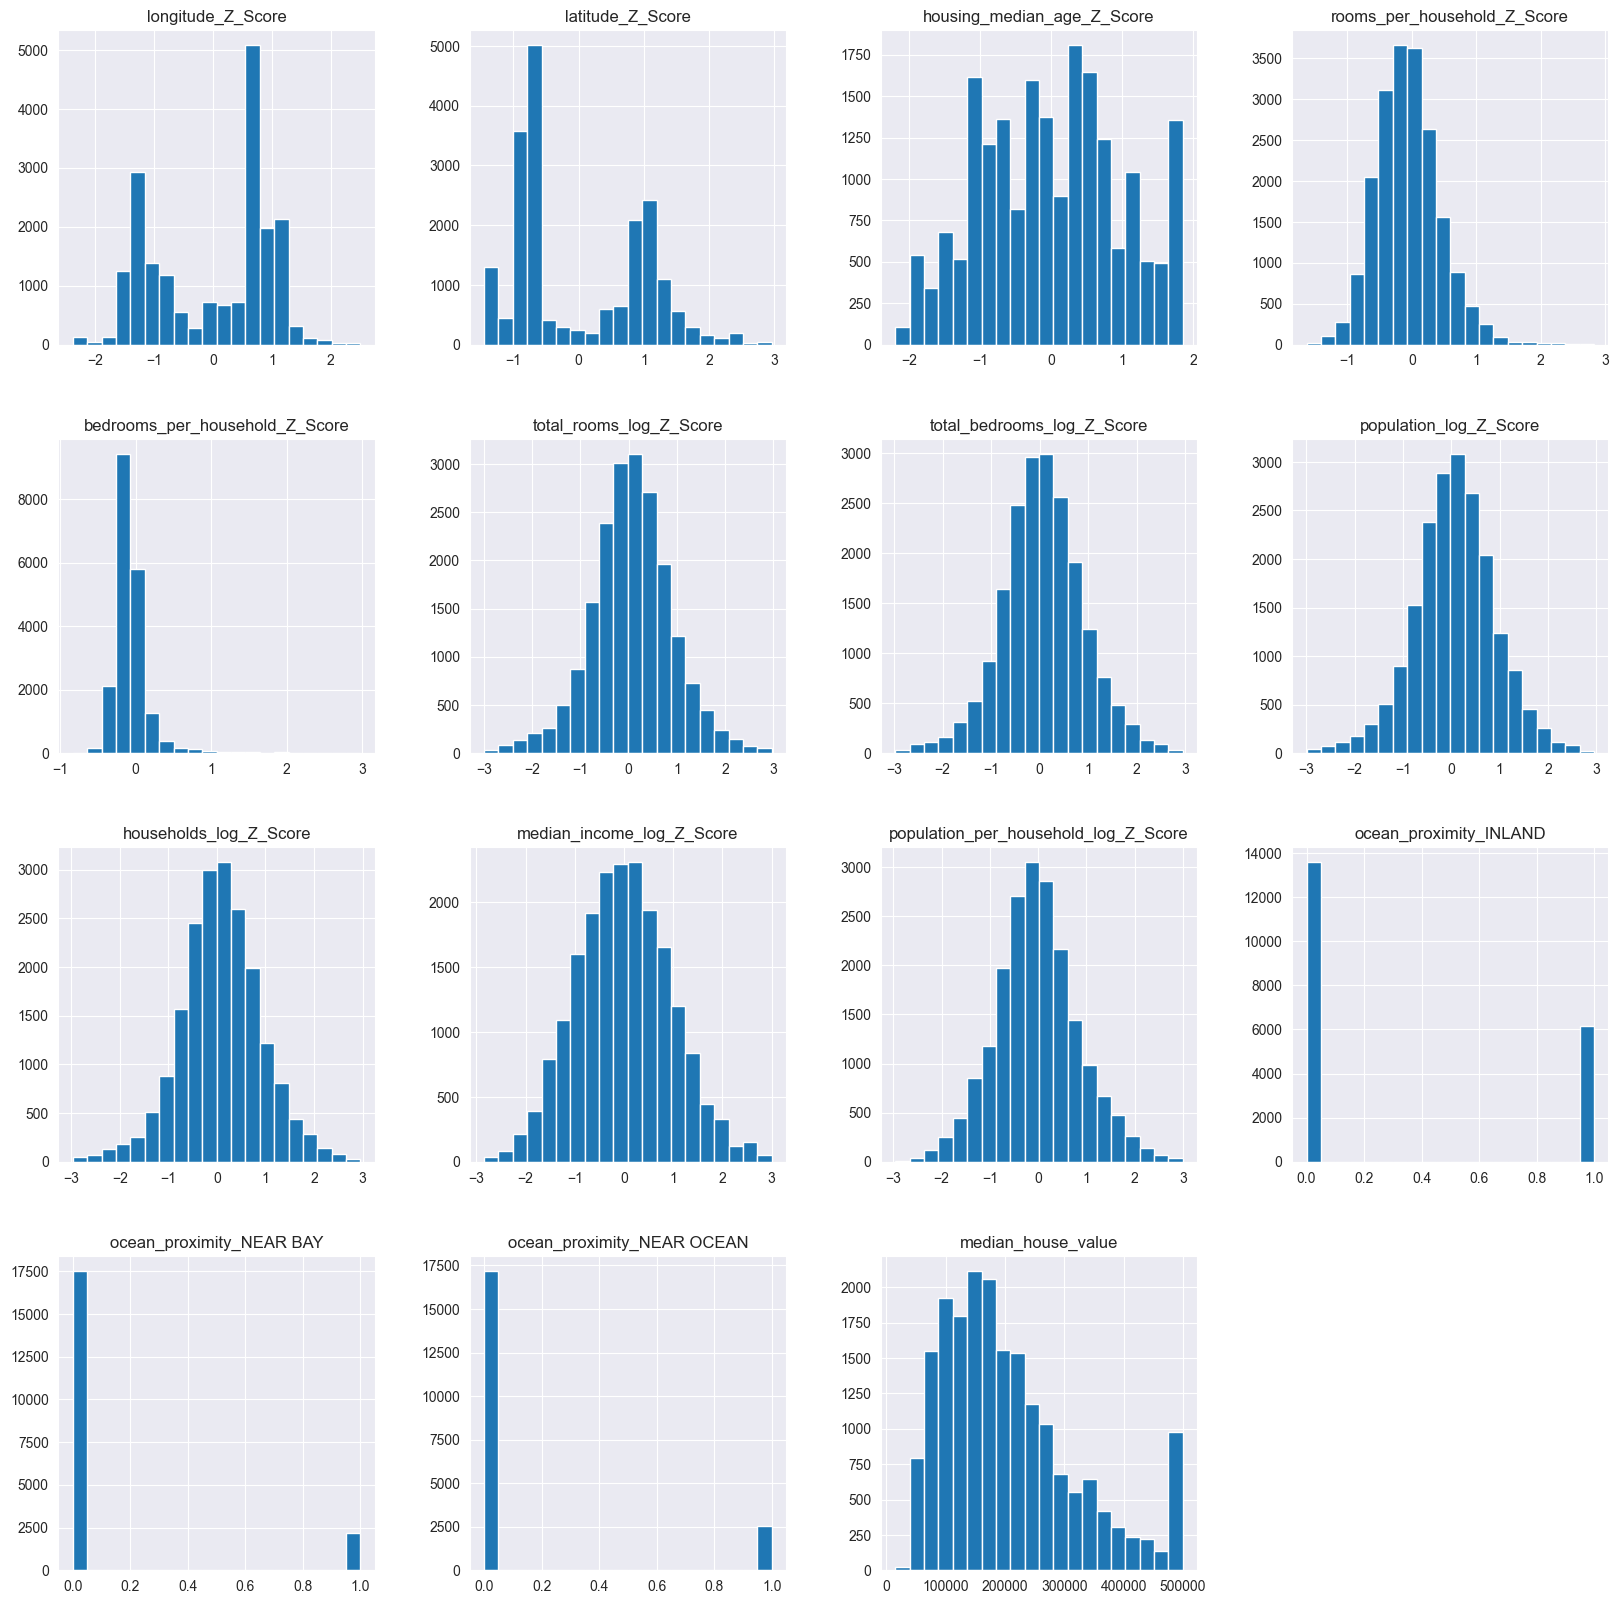

In [51]:
# data distribution after removing outliers : 
housing_data_no_outliers.hist(bins=20, figsize=(20, 20))
plt.show()

In [52]:
# Explicitly creating a copy of the DataFrame
housing_data_no_outliers = housing_data_no_outliers.copy()

# Then perform the operation
housing_data_no_outliers['sqrt_median_house_value'] = np.sqrt(housing_data_no_outliers['median_house_value'])


In [53]:
housing_data_no_outliers.columns


Index(['longitude_Z_Score', 'latitude_Z_Score', 'housing_median_age_Z_Score',
       'rooms_per_household_Z_Score', 'bedrooms_per_household_Z_Score',
       'total_rooms_log_Z_Score', 'total_bedrooms_log_Z_Score',
       'population_log_Z_Score', 'households_log_Z_Score',
       'median_income_log_Z_Score', 'population_per_household_log_Z_Score',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'median_house_value',
       'sqrt_median_house_value'],
      dtype='object')

In [54]:
data_frame = housing_data_no_outliers.drop(['median_house_value'], axis=1)

In [55]:
data_frame.columns

Index(['longitude_Z_Score', 'latitude_Z_Score', 'housing_median_age_Z_Score',
       'rooms_per_household_Z_Score', 'bedrooms_per_household_Z_Score',
       'total_rooms_log_Z_Score', 'total_bedrooms_log_Z_Score',
       'population_log_Z_Score', 'households_log_Z_Score',
       'median_income_log_Z_Score', 'population_per_household_log_Z_Score',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'sqrt_median_house_value'],
      dtype='object')

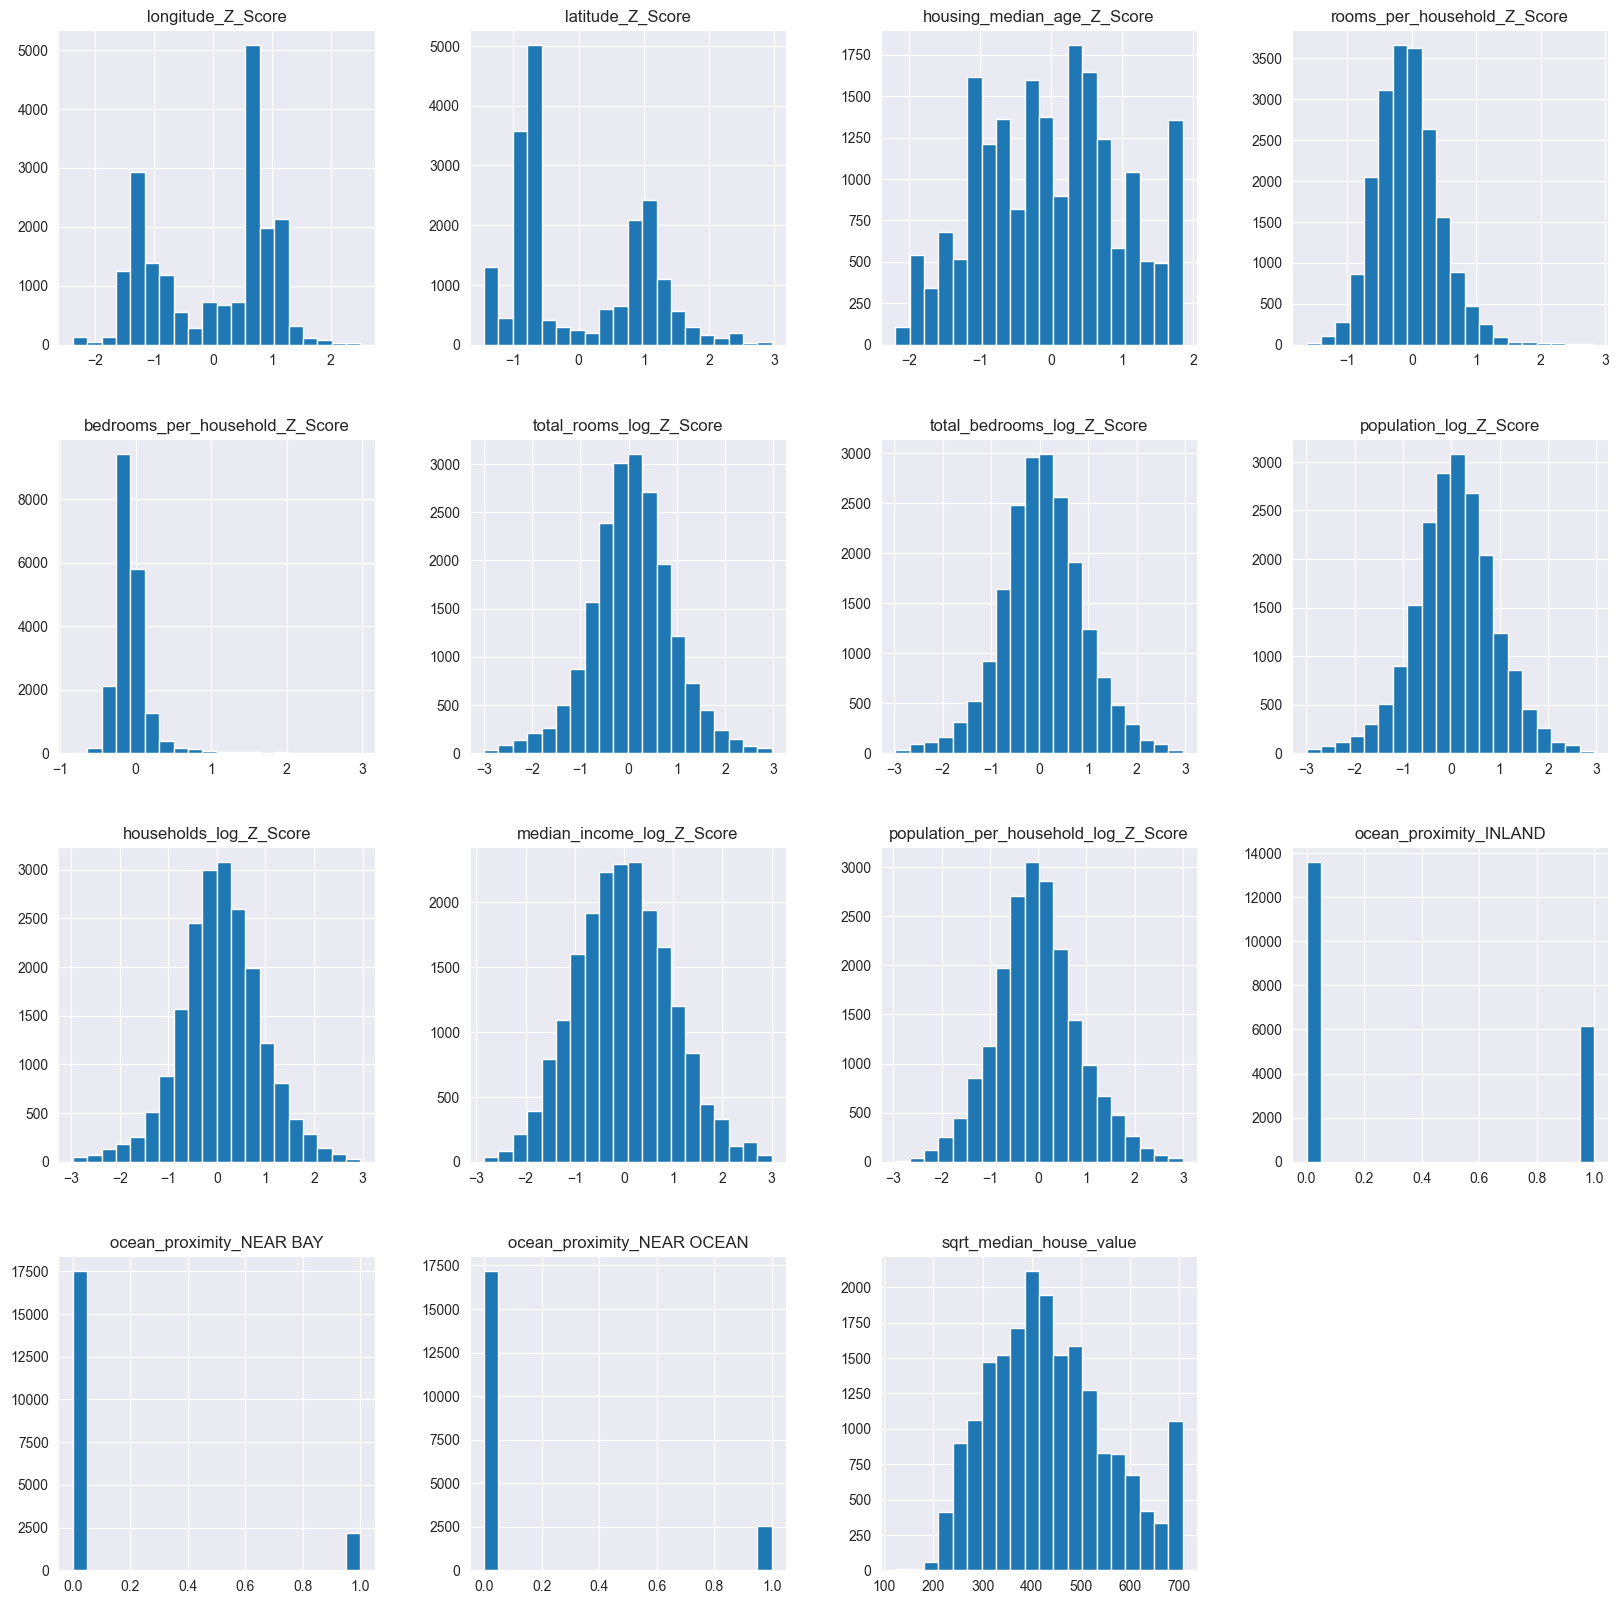

In [56]:
# data distribution after applying sqrt transformation  : 
data_frame.hist(bins=20, figsize=(20, 20))
plt.show()

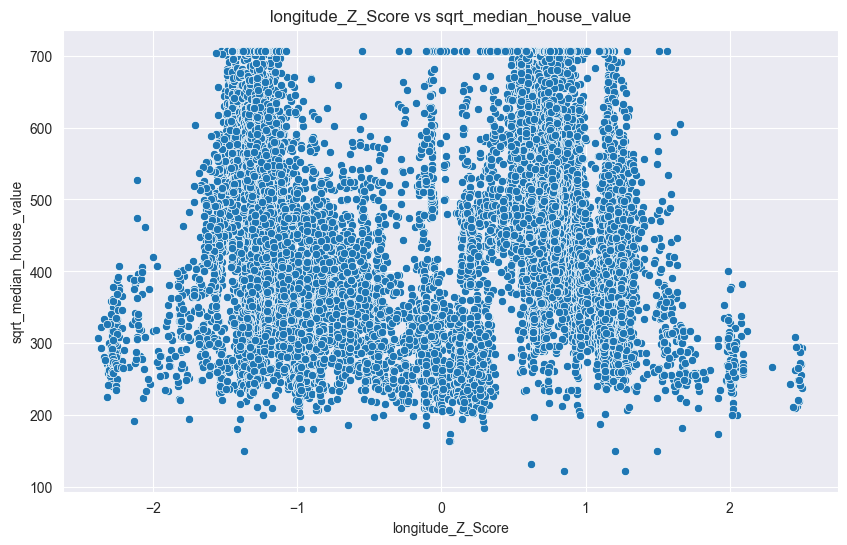

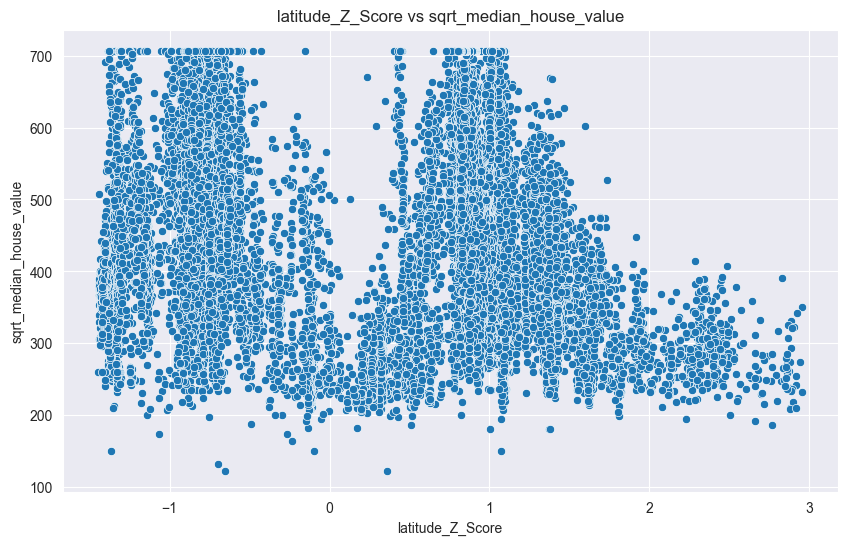

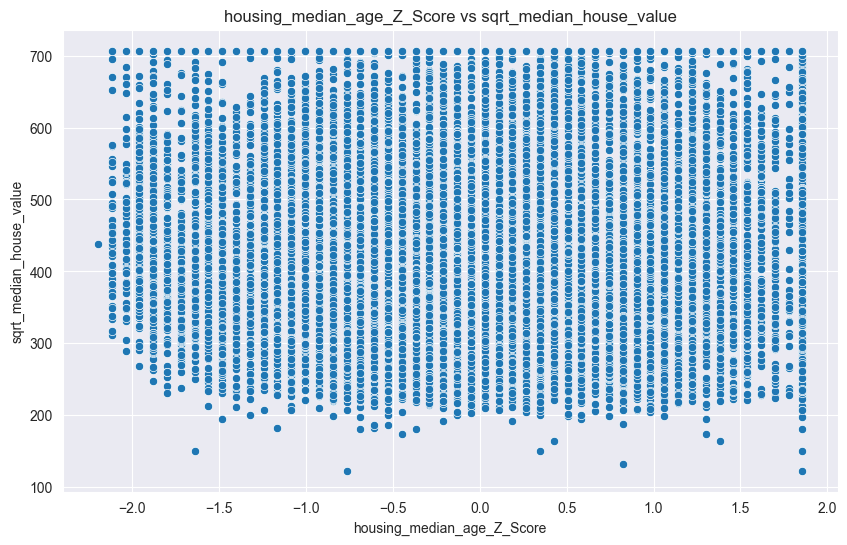

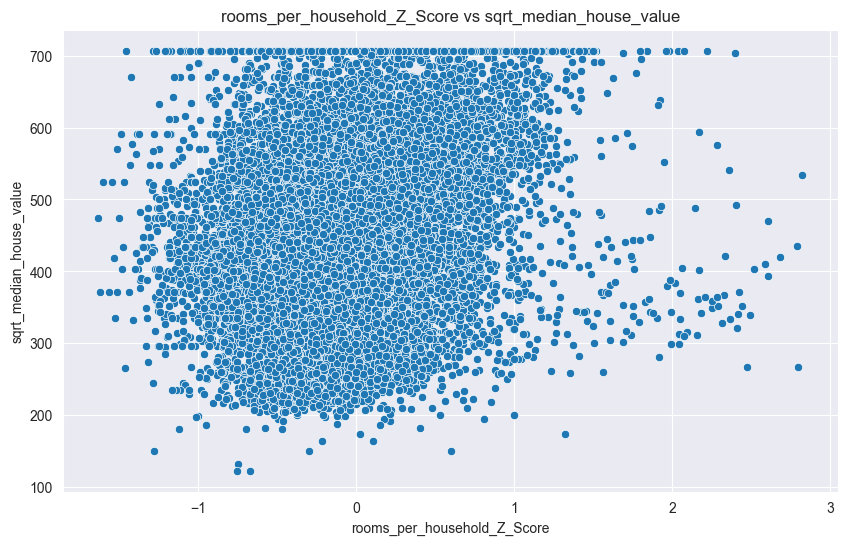

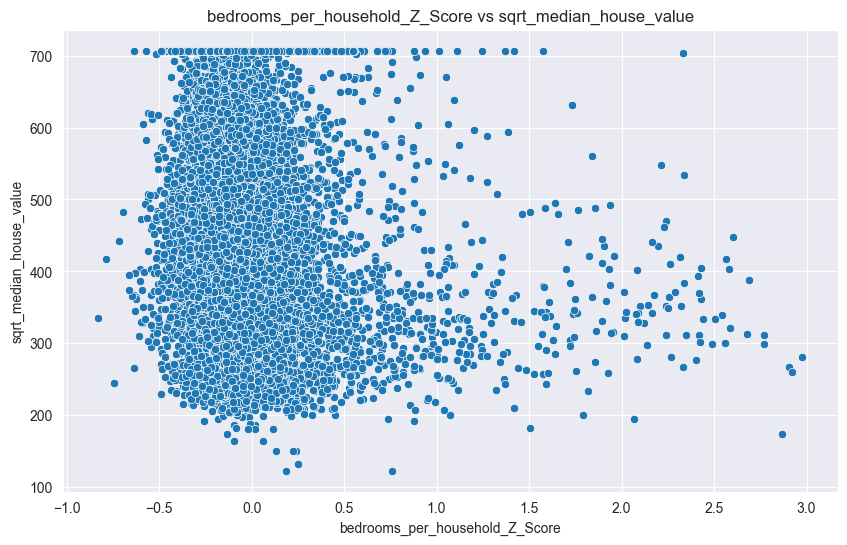

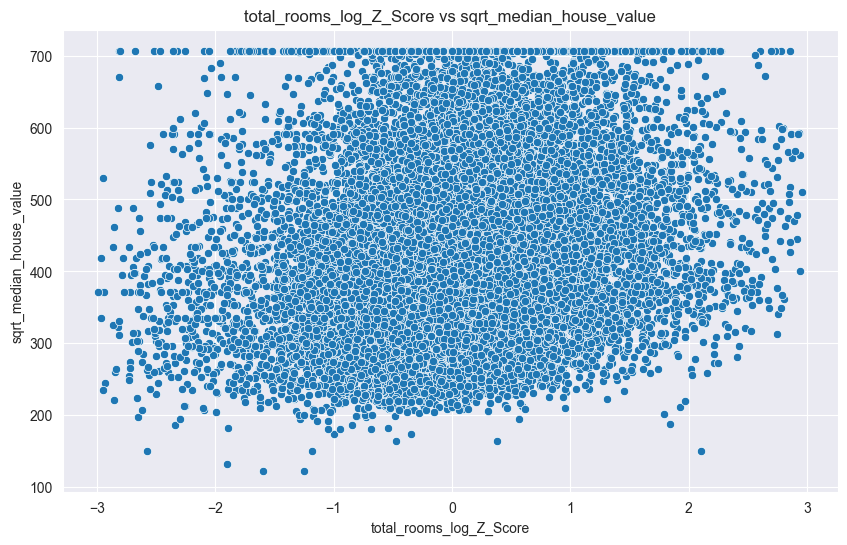

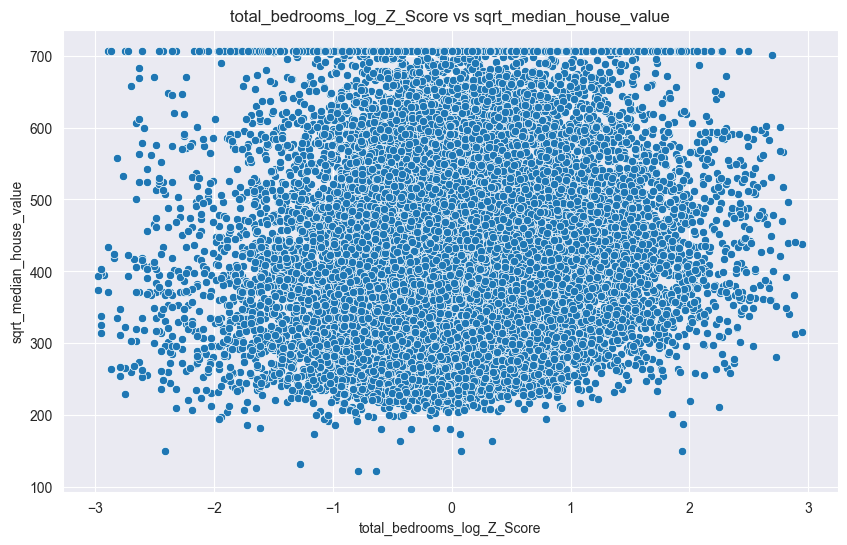

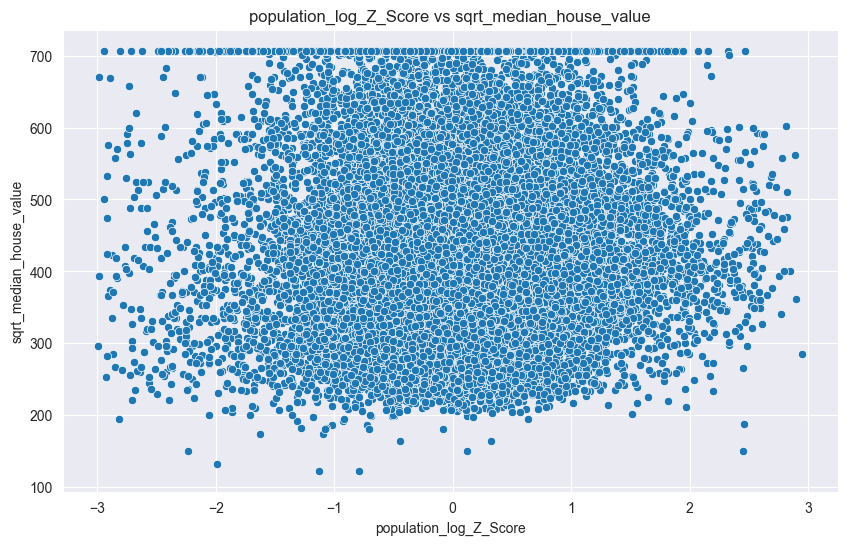

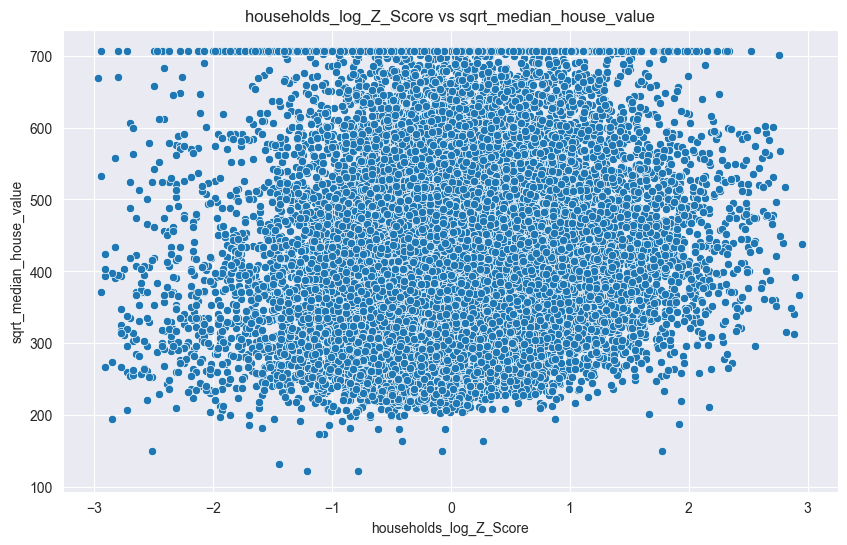

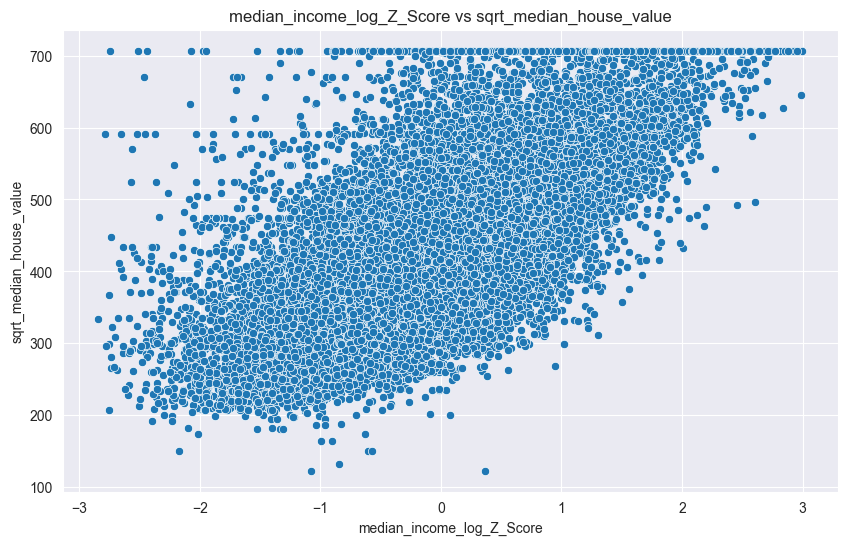

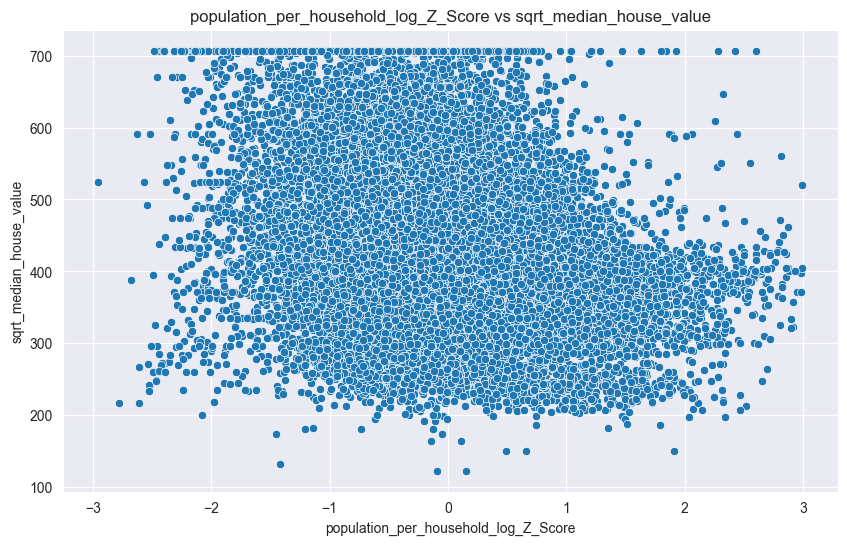

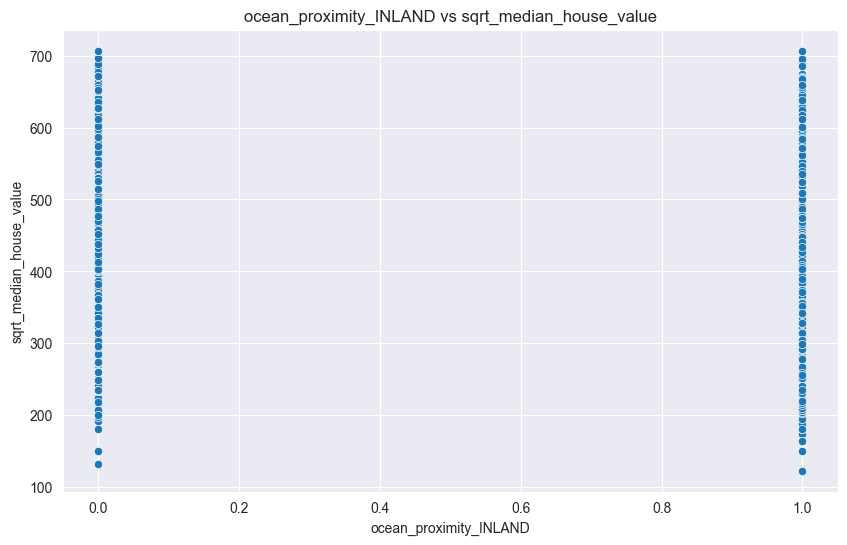

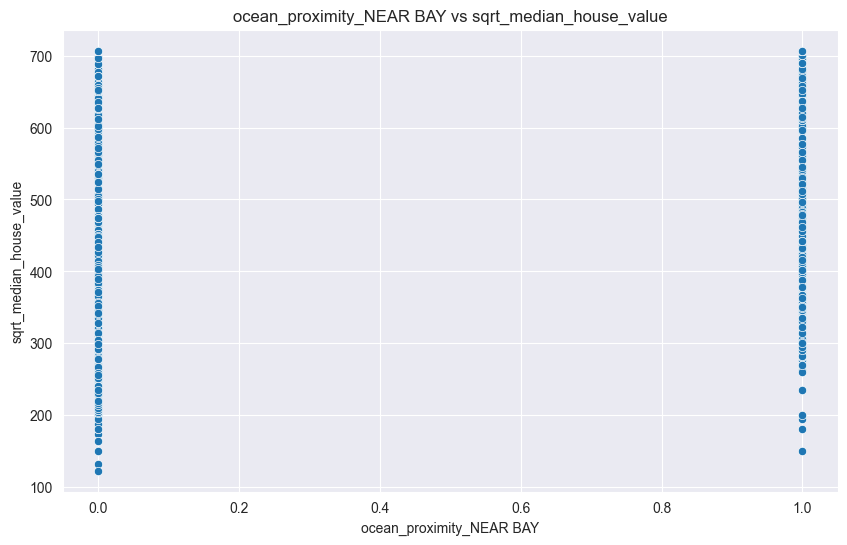

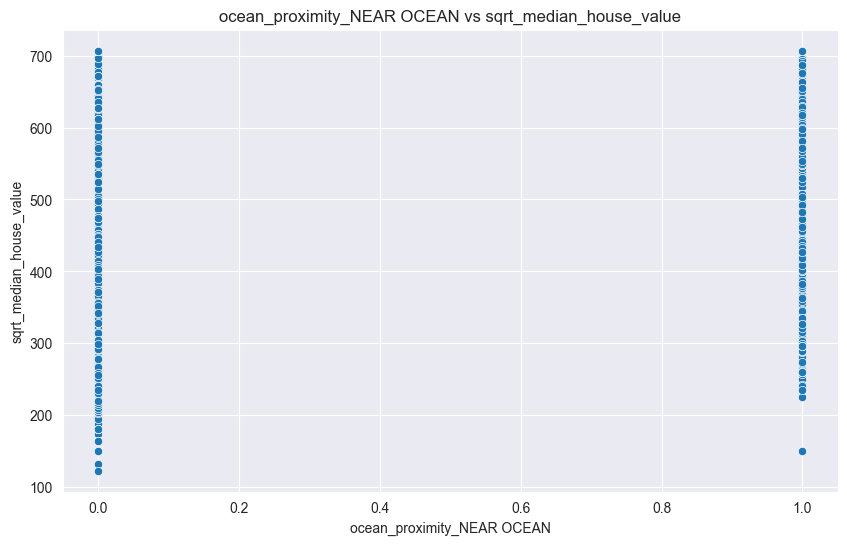

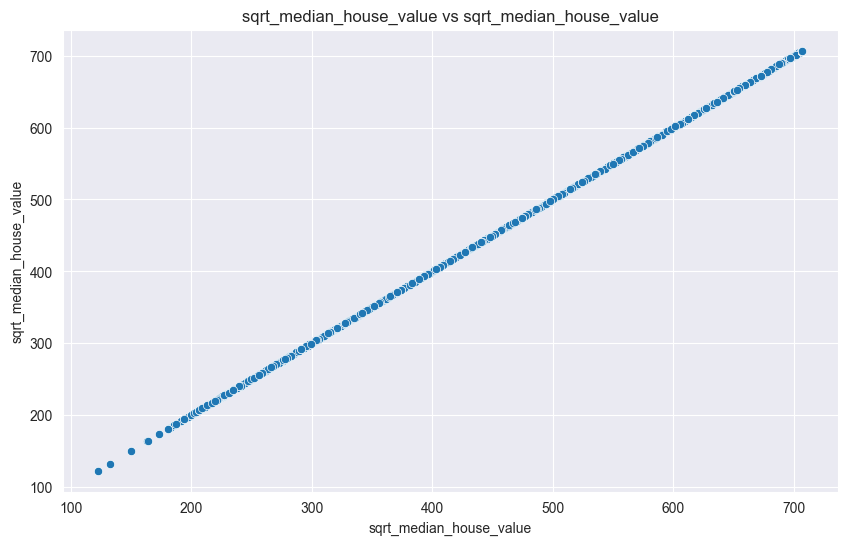

In [57]:
# lets do some scater plots to visualize the relationships 
for col in data_frame.columns : 
    relationship(data_frame, col, 'sqrt_median_house_value')

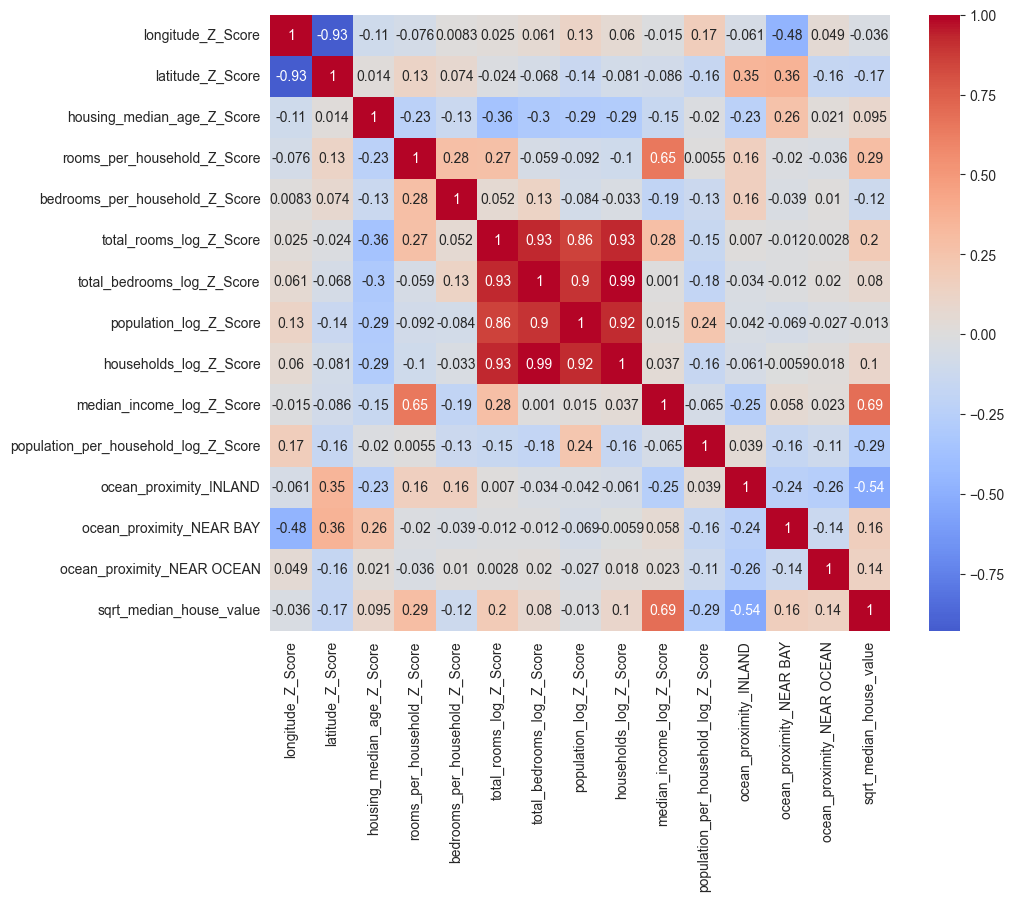

In [58]:
# Calculate the correlation matrix
corr_matrix = data_frame.corr()
# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

# Display the heatmap
plt.show()

In [59]:
# Set the threshold for high correlation
threshold = 0.8

# Find the pairs of features with correlation above the threshold
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold]

# Print the highly correlated pairs
print("Highly correlated pairs:", high_corr_pairs)


Highly correlated pairs: [('longitude_Z_Score', 'latitude_Z_Score'), ('latitude_Z_Score', 'longitude_Z_Score'), ('total_rooms_log_Z_Score', 'total_bedrooms_log_Z_Score'), ('total_rooms_log_Z_Score', 'population_log_Z_Score'), ('total_rooms_log_Z_Score', 'households_log_Z_Score'), ('total_bedrooms_log_Z_Score', 'total_rooms_log_Z_Score'), ('total_bedrooms_log_Z_Score', 'population_log_Z_Score'), ('total_bedrooms_log_Z_Score', 'households_log_Z_Score'), ('population_log_Z_Score', 'total_rooms_log_Z_Score'), ('population_log_Z_Score', 'total_bedrooms_log_Z_Score'), ('population_log_Z_Score', 'households_log_Z_Score'), ('households_log_Z_Score', 'total_rooms_log_Z_Score'), ('households_log_Z_Score', 'total_bedrooms_log_Z_Score'), ('households_log_Z_Score', 'population_log_Z_Score')]


In [60]:
df_no_corr = data_frame.drop(['population_log_Z_Score',  'total_bedrooms_log_Z_Score', 'total_rooms_log_Z_Score'], axis = 1)

In [61]:
df_no_corr.columns

Index(['longitude_Z_Score', 'latitude_Z_Score', 'housing_median_age_Z_Score',
       'rooms_per_household_Z_Score', 'bedrooms_per_household_Z_Score',
       'households_log_Z_Score', 'median_income_log_Z_Score',
       'population_per_household_log_Z_Score', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN',
       'sqrt_median_house_value'],
      dtype='object')

In [62]:
from sklearn.decomposition import PCA

# Select features to combine
features_to_combine = ['longitude_Z_Score', 'latitude_Z_Score']

# Apply PCA
pca = PCA(n_components=1)
combined_feature = pca.fit_transform(df_no_corr[features_to_combine])

# Add the combined feature to the dataframe
df_no_corr['lat_long_Z_Score'] = combined_feature

# Drop the original features
assia_df = df_no_corr.drop(columns=features_to_combine)

In [63]:
assia_df.columns

Index(['housing_median_age_Z_Score', 'rooms_per_household_Z_Score',
       'bedrooms_per_household_Z_Score', 'households_log_Z_Score',
       'median_income_log_Z_Score', 'population_per_household_log_Z_Score',
       'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'sqrt_median_house_value',
       'lat_long_Z_Score'],
      dtype='object')

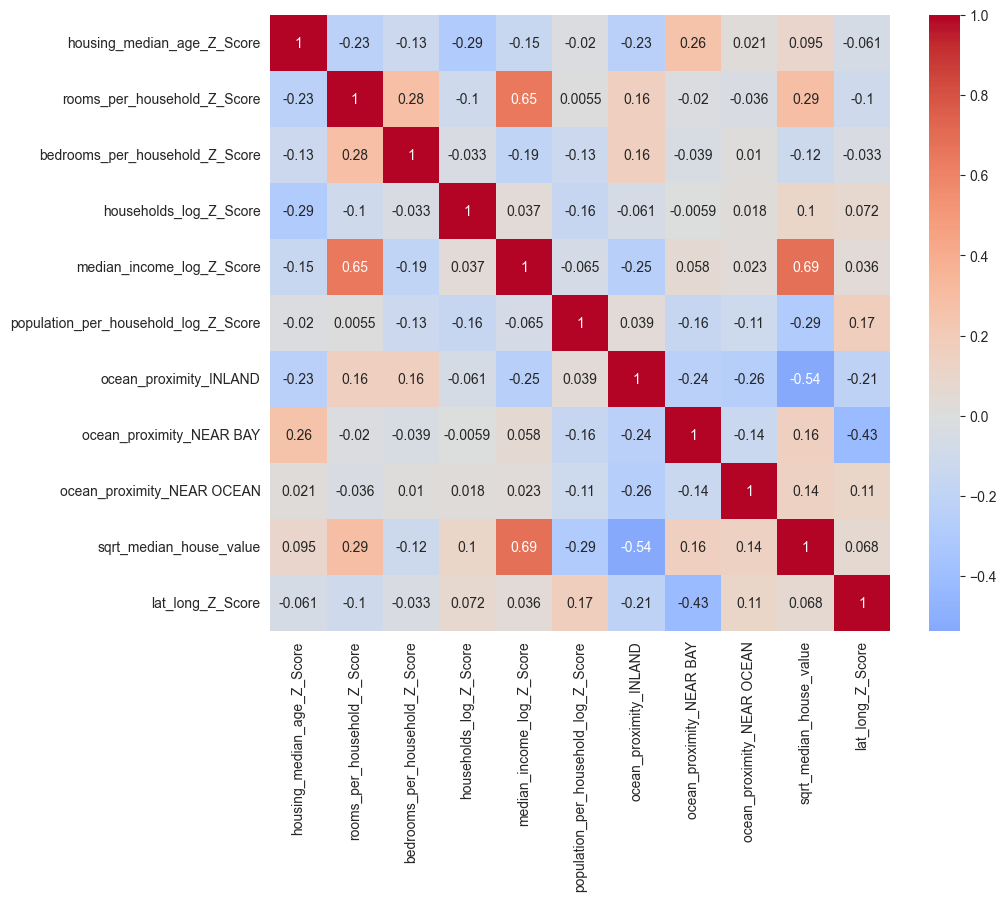

In [64]:
# Calculate the correlation matrix
corr_matrix_2 = assia_df.corr()
# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix_2, annot=True, cmap='coolwarm', center=0)

# Display the heatmap
plt.show()

# now let's try some models 


## data splitting 

In [93]:

from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = assia_df.drop(columns=['sqrt_median_house_value'])
y = assia_df['sqrt_median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
#print("X_train shape:", X_train.shape)
#print("X_test shape:", X_test.shape)
#print("y_train shape:", y_train.shape)
#print("y_test shape:", y_test.shape)
X_test.head()


housing_median_age_Z_Score  rooms_per_household_Z_Score  \
16676                    0.426556                     0.116091   
8748                     0.585414                     0.264766   
14146                    0.744272                    -0.301645   
1682                     0.426556                    -0.165421   
10793                    0.505985                     0.133448   

       bedrooms_per_household_Z_Score  households_log_Z_Score  \
16676                        0.086995                0.429878   
8748                        -0.074617               -0.414190   
14146                       -0.276082                0.033252   
1682                        -0.351484               -0.206133   
10793                       -0.077362               -0.310566   

       median_income_log_Z_Score  population_per_household_log_Z_Score  \
16676                  -0.300268                             -1.011377   
8748                    1.283477                              0.256784   
14146                  -0.532891                             -0.198898   
1682                    0.492104                             -0.075077   
10793                   1.418872                             -0.757481   

       ocean_proximity_INLAND  ocean_proximity_NEAR BAY  \
16676                     0.0                       0.0   
8748                      0.0                       0.0   
14146                     0.0                       0.0   
1682                      0.0                       1.0   
10793                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  lat_long_Z_Score  
16676                         1.0         -0.228815  
8748                          0.0          1.026953  
14146                         1.0          1.839709  
1682                          0.0         -1.747078  
10793                         0.0          1.248456

## loading models

In [66]:

'''from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline'''


'from sklearn.model_selection import GridSearchCV, RandomizedSearchCV\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.svm import SVR\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.pipeline import Pipeline'

### random forest regressor 

In [67]:
'''from sklearn.ensemble import RandomForestRegressor


# Choose a model
model1 = RandomForestRegressor()

# Define the parameter grid
param_grid1 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model1 , 
    param_grid1
    , cv=5, return_train_score=False)

# Fit the model
grid_search.fit(X_train, y_train)

# Review the results
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", -grid_search.best_score_)

# Evaluate the best model on the test set
#best_model = grid_search.best_estimator_
#y_pred = best_model.predict(X_test)
#print("Test set Mean Squared Error: ", mean_squared_error(y_test, y_pred))'''

'from sklearn.ensemble import RandomForestRegressor\n\n\n# Choose a model\nmodel1 = RandomForestRegressor()\n\n# Define the parameter grid\nparam_grid1 = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\n\n# Initialize GridSearchCV\ngrid_search = GridSearchCV(model1 , \n    param_grid1\n    , cv=5, return_train_score=False)\n\n# Fit the model\ngrid_search.fit(X_train, y_train)\n\n# Review the results\nprint("Best parameters found: ", grid_search.best_params_)\nprint("Best cross-validation score: ", -grid_search.best_score_)\n\n# Evaluate the best model on the test set\n#best_model = grid_search.best_estimator_\n#y_pred = best_model.predict(X_test)\n#print("Test set Mean Squared Error: ", mean_squared_error(y_test, y_pred))'

In [68]:
'''from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, scoring='neg_mean_squared_error')
    
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    
    plt.grid()
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

plot_learning_curve(RandomForestRegressor(n_estimators=200), "Learning Curves (RandomForestRegressor)", X_train, y_train, cv=5)
plt.show()'''


'from sklearn.model_selection import learning_curve\n\ndef plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=-1):\n    plt.figure()\n    plt.title(title)\n    plt.xlabel("Training examples")\n    plt.ylabel("Score")\n    \n    train_sizes, train_scores, test_scores = learning_curve(\n        estimator, X, y, cv=cv, n_jobs=n_jobs, scoring=\'neg_mean_squared_error\')\n    \n    train_scores_mean = -train_scores.mean(axis=1)\n    test_scores_mean = -test_scores.mean(axis=1)\n    \n    plt.grid()\n    \n    plt.plot(train_sizes, train_scores_mean, \'o-\', color="r", label="Training score")\n    plt.plot(train_sizes, test_scores_mean, \'o-\', color="g", label="Cross-validation score")\n    \n    plt.legend(loc="best")\n    return plt\n\nplot_learning_curve(RandomForestRegressor(n_estimators=200), "Learning Curves (RandomForestRegressor)", X_train, y_train, cv=5)\nplt.show()'

In [69]:
'''X_train.shape'''

'X_train.shape'

In [70]:
# split the data to get it more fast to try gridserachcv 
'''x_train_small = X_train[:500]'''

'x_train_small = X_train[:500]'

In [71]:
'''x_train_small.shape'''

'x_train_small.shape'

In [72]:
''''y_train_small = y_train[:500]'''

"'y_train_small = y_train[:500]"

In [73]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [74]:
'''model_params = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params' : {
            'fit_intercept': [True, False]
        }  
    },
    'SVR': {
        'model' : SVR(),
        'params' : {
            'C': [0.1, 1, 10, 100, 1000],
            'epsilon': [0.1, 0.2, 0.5, 0.3, 1],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
        }        
    },
    'Lasso': {
        'model': Lasso(),
        'params' : {
            'alpha': [0.1, 1.0, 10.0]
        }
    },   
    'Ridge': {
        'model': Ridge(),
        'params' : {
            'alpha': [0.1, 1.0, 10.0]
        }           
    },
    'KNeighborsRegressor' : {
        'model': KNeighborsRegressor(),
        'params' : {            
            'n_neighbors': [3, 5, 7, 10, 15],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
        }
    }
'''


"model_params = {\n    'LinearRegression': {\n        'model': LinearRegression(),\n        'params' : {\n            'fit_intercept': [True, False]\n        }  \n    },\n    'SVR': {\n        'model' : SVR(),\n        'params' : {\n            'C': [0.1, 1, 10, 100, 1000],\n            'epsilon': [0.1, 0.2, 0.5, 0.3, 1],\n            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]\n        }        \n    },\n    'Lasso': {\n        'model': Lasso(),\n        'params' : {\n            'alpha': [0.1, 1.0, 10.0]\n        }\n    },   \n    'Ridge': {\n        'model': Ridge(),\n        'params' : {\n            'alpha': [0.1, 1.0, 10.0]\n        }           \n    },\n    'KNeighborsRegressor' : {\n        'model': KNeighborsRegressor(),\n        'params' : {            \n            'n_neighbors': [3, 5, 7, 10, 15],\n            'weights': ['uniform', 'distance'],\n            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']\n}\n        }\n    }\n"

In [75]:
# let's perform grid search with multiple algorithms 
'''scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train_small, y_train_small)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_grid = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_grid
'''

"scores = []\n\nfor model_name, mp in model_params.items():\n    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)\n    clf.fit(x_train_small, y_train_small)\n    scores.append({\n        'model': model_name,\n        'best_score': clf.best_score_,\n        'best_params': clf.best_params_\n    })\n    \ndf_grid = pd.DataFrame(scores,columns=['model','best_score','best_params'])\ndf_grid\n"

In [76]:
# grid search for svr model 
'''svr_model_params = {     
            'C': [0.1, 1, 10, 100],                 # Regularization parameter
            'kernel': ['linear', 'poly'], # Specifies the kernel type to be used in the algorithm
            'degree': [2, 3],                      # Degree of the polynomial kernel function ('poly'), ignored by others
            'gamma': ['scale', 'auto', 0.001, 0.01], # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
            'coef0': [ 0.5, 1.0],               # Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'
            'epsilon': [0.1, 0.2, 1.0],             # Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value
            'shrinking': [True, False],                  # Whether to use the shrinking heuristic
            'tol': [1e-5],                   # Tolerance for stopping criterion                                           
        }     
#{C:100,epsilon = 1, gamma = auto} best score : 0.713 '''

"svr_model_params = {     \n            'C': [0.1, 1, 10, 100],                 # Regularization parameter\n            'kernel': ['linear', 'poly'], # Specifies the kernel type to be used in the algorithm\n            'degree': [2, 3],                      # Degree of the polynomial kernel function ('poly'), ignored by others\n            'gamma': ['scale', 'auto', 0.001, 0.01], # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'\n            'coef0': [ 0.5, 1.0],               # Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'\n            'epsilon': [0.1, 0.2, 1.0],             # Epsilon in the epsilon-SVR model. It specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value\n            'shrinking': [True, False],                  # Whether to use the shrinking heuristic\n            'tol': [1e-5],                   # Tolerance for stopping c

In [77]:
'''grid_clf = GridSearchCV(SVR(max_iter=-1),svr_model_params , cv=5, return_train_score=False)
grid_clf.fit(x_train_small, y_train_small)
print("Best parameters found: ", grid_clf.best_params_)
print("Best cross-validation score: ", grid_clf.best_score_)'''


'grid_clf = GridSearchCV(SVR(max_iter=-1),svr_model_params , cv=5, return_train_score=False)\ngrid_clf.fit(x_train_small, y_train_small)\nprint("Best parameters found: ", grid_clf.best_params_)\nprint("Best cross-validation score: ", grid_clf.best_score_)'

In [78]:
# train the model : 
'''model_final = SVR(C = 100 , epsilon= 1 , gamma= 'auto')
model_final.fit(X_train, y_train)'''


"model_final = SVR(C = 100 , epsilon= 1 , gamma= 'auto')\nmodel_final.fit(X_train, y_train)"

In [79]:
#model_final.score(X_test, y_test)

In [80]:
#rfr = RandomForestRegressor()
#rfr.fit(X_train , y_train)

In [81]:
#rfr.score(X_test, y_test)

In [82]:
#hyper parameter tuning for random forest regressor : 
param_grid_r = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [83]:
'''grid_clf = GridSearchCV(RandomForestRegressor(),param_grid_r , cv=5, return_train_score=False)
grid_clf.fit(x_train_small, y_train_small)
print("Best parameters found: ", grid_clf.best_params_)
print("Best cross-validation score: ", grid_clf.best_score_)'''

'grid_clf = GridSearchCV(RandomForestRegressor(),param_grid_r , cv=5, return_train_score=False)\ngrid_clf.fit(x_train_small, y_train_small)\nprint("Best parameters found: ", grid_clf.best_params_)\nprint("Best cross-validation score: ", grid_clf.best_score_)'

In [84]:
# save the model 
import pickle

# Assuming 'model' is your trained model
#with open('my_model_.pkl', 'wb') as file:
    #pickle.dump(rfr, file)


In [85]:
import json

In [86]:
'''my_cols = assia_df.columns'''



'my_cols = assia_df.columns'

In [87]:
'''#columns = {
    'data_cols' : [col.lower() for col in my_cols ]
}
columns'''

"#columns = {\n    'data_cols' : [col.lower() for col in my_cols ]\n}\ncolumns"

In [88]:
#with open("columns.json", "w") as f : 
    #f.write(json.dumps(columns))
